In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Steps
1. Define a distribution to sample from, say Gaussian

2. Intial guess

3. Perform the Jump

4. Accept/Recept the samples

5. Keep jumping (repeat step 3)

6. Remove the burn-in samples


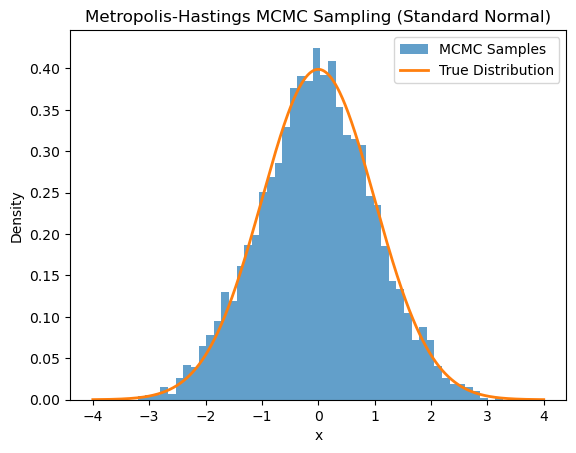

In [30]:
# Define target distribution 
def target_distribution(x):
     return 1/(np.sqrt(2*np.pi))*np.exp(-x**2 / 2)

# Using Metropolis-Hastings Algorithm
def Metropolis_Hastings(target_distribution, initial_guess, proposal_std, n):
    sample = np.zeros(n)
    x = initial_guess
    for i in range(n):
        # Propose a new point from the proposal distribution
        xnew = np.random.normal(x, proposal_std)
        # Acceptance ratio
        a = target_distribution(xnew) / target_distribution(x)
        # Accept or reject the new sample
        if np.random.rand()< a:
            x = xnew
        # Store the current state in the sample array
        sample[i] = x
    return sample

# Test
# Number of samples
n = 10000
# Initial guess
initial_guess = 0
# Proposal distribution standard deviation
proposal_std =0.5
# Run the Metropolis-Hastings algorithm
mcmc_op = Metropolis_Hastings(target_distribution, initial_guess, proposal_std, n)

# Plot the histogram of the samples
plt.hist(mcmc_op, bins=50, density=True, alpha=0.7, label='MCMC Samples')

# Overlay the true Standard Normal Distribution for comparison
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), label='True Distribution', linewidth=2)
plt.legend()
plt.title('Metropolis-Hastings MCMC Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

Burn-in point: The chain likelihood exceeds the median likelihood of the entire chain, that point marks the burn-in point

In [44]:
def get_burn_in_point(sample,target_distribution):
    chain_likelihood=target_distribution(sample)
    median_likelihood=np.median(chain_likelihood)
    burn_in_point=np.argmax(chain_likelihood>median_likelihood)
    return burn_in_point

In [47]:
mcmc_samples_after_burning = mcmc_op[get_burn_in_point(mcmc_op, target_distribution):]

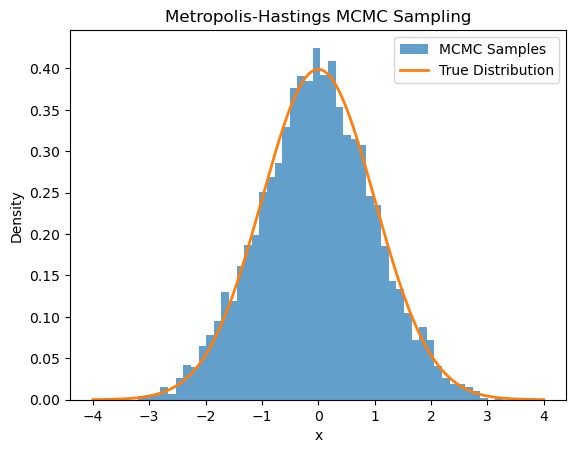

In [48]:
# Plot the histogram of the samples
plt.hist(mcmc_samples_after_burning, bins=50, density=True, alpha=0.7, label='MCMC Samples')

# Overlay the true Standard Normal Distribution for comparison
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), label='True Distribution', linewidth=2)
plt.legend()
plt.title('Metropolis-Hastings MCMC Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

If mixing is implemented, these parameters should also be found in the corresponding iterations

More cases look into: https://www.tweag.io/blog/2019-10-25-mcmc-intro1/